In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('sales.csv')

In [3]:
ds.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
ds.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
ds.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <a list of 10 Patch objects>)

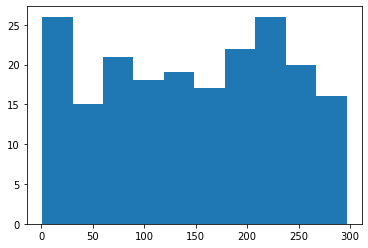

In [6]:
plt.hist('TV',data=ds)

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <a list of 10 Patch objects>)

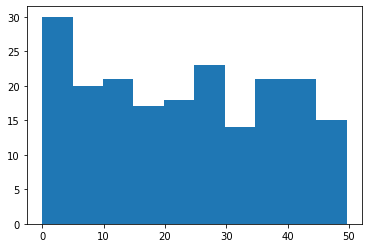

In [7]:
plt.hist('radio',data=ds)

(array([47., 41., 35., 30., 21., 13.,  9.,  2.,  1.,  1.]),
 array([  0.3 ,  11.67,  23.04,  34.41,  45.78,  57.15,  68.52,  79.89,
         91.26, 102.63, 114.  ]),
 <a list of 10 Patch objects>)

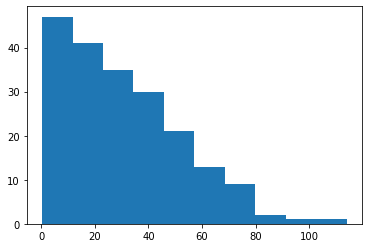

In [8]:
plt.hist('newspaper',data=ds)

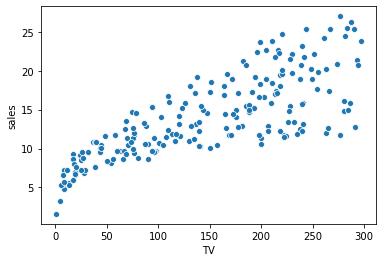

In [9]:
sns.scatterplot(x='TV',y='sales',data=ds)

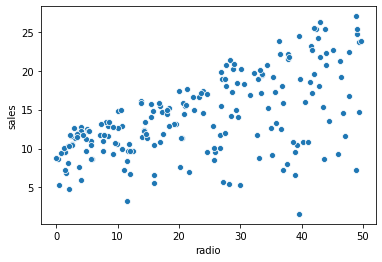

In [10]:
sns.scatterplot(x='radio',y='sales',data=ds)

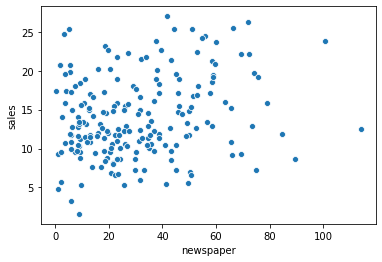

In [11]:
sns.scatterplot(x='newspaper',y='sales',data=ds)

In [12]:
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_fin = ds.loc[(z_score<3).all(axis=1)]
print(ds_fin.shape)

(200, 4)
(198, 4)


In [13]:
ds_fin.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


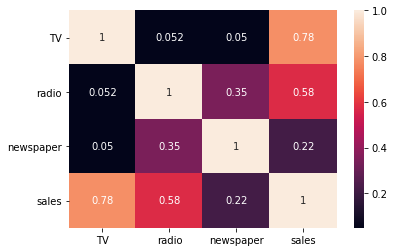

In [14]:
sns.heatmap(ds_fin.corr(),color='k',annot=True)
plt.show()

In [15]:
ds_fin.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [16]:
ds_fin.drop('newspaper',axis=1,inplace=True)

C:\Users\atakle\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
ds_fin.head()

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [18]:
x=ds_fin.iloc[:,:-1]

In [19]:
x.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [20]:
y=ds_fin['sales']

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.97869734,  0.98952135],
       [-1.19901165,  1.09070498],
       [-1.51933199,  1.53591293],
       [ 0.05645636,  1.22561648],
       [ 0.40024339, -0.83178391],
       [-1.61906543,  1.73828018],
       [-1.04647815,  0.6522426 ],
       [-0.31079737, -0.23817331],
       [-1.62023876, -1.41864895],
       [ 0.62317696, -1.38492107],
       [-0.94557138, -1.16906267],
       [ 0.79800381,  0.05863199],
       [-1.44189191,  0.80739083],
       [-0.57714432, -1.04764232],
       [ 0.67363035,  0.65898817],
       [ 0.57155024,  1.65733328],
       [ 1.58061798,  1.1109417 ],
       [-0.90919801, -0.17746313],
       [ 0.0071763 ,  0.05188642],
       [ 0.84141719,  0.30821827],
       [ 1.06435076, -1.21628169],
       [-1.56626537, -0.48775959],
       [ 0.95757732, -0.42030384],
       [-0.99015809, -0.71036356],
       [ 1.36355108, -1.32421089],
       [-0.04445042,  0.41614747],
       [ 1.0960308 , -0.43379499],
       [ 1.19811091,  0.26774482],
       [-0.89277132,

In [22]:
x=pd.DataFrame(x)

In [23]:
x.head()

,0,1
0,0.978697,0.989521
1,-1.199012,1.090705
2,-1.519332,1.535913
3,0.056456,1.225616
4,0.400243,-0.831784


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [26]:
print(x_train.shape)
print(y_train.shape)

(158, 2)
(158,)


In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
pred_lr=lr.predict(x_test)

In [29]:
r2_score(y_test,pred_lr)

0.9028883880054271

In [30]:
x1=ds_fin.iloc[:,0:-1]
y1=ds_fin.iloc[:,-1]

In [31]:
print(x1.shape)
print(y1.shape)

(198, 2)
(198,)


In [32]:
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    lr.fit(x1_train,y1_train)
    pred_lr = lr.predict(x1_test)
    x=r2_score(y1_test,pred_lr)
    if x>r2_scr:
        r2_scr = x
        random_state=i

In [33]:
print(r2_scr,random_state)

0.9478525634614251 90


In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
r2_scr_rfr = 0
random_state_rfr=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    rfr.fit(x1_train,y1_train)
    pred_rfr = rfr.predict(x1_test)
    x=r2_score(y1_test,pred_rfr)
    if x>r2_scr_rfr:
        r2_scr_rfr = x
        random_state_rfr=i
print(r2_scr_rfr,random_state_rfr)
print(r2_score(y1_test,pred_rfr))

0.9894112710671552 50
0.9818358136659583


In [37]:
print(pred_rfr)
print(y1_test)

[11.879  6.997 11.171  8.44   9.85  11.684 11.049 12.746 21.298 21.104
 14.19  21.912  5.2   18.271 12.938  8.174 12.49  23.467 11.607 14.732
  7.266  8.044 12.343 10.313 18.064 20.652 15.668 10.518 25.007 11.59
 13.98  18.784 15.122 14.5   14.247 11.84   8.999 24.241 23.363 20.486]
135    11.6
119     6.6
73     11.0
66      9.5
191     9.9
50     11.4
180    10.5
67     13.4
93     22.2
137    20.8
37     14.7
47     23.2
155     3.2
41     17.1
179    12.6
195     7.6
25     12.0
128    24.7
9      10.6
87     16.0
121     7.0
44      8.5
81     12.3
51     10.7
64     18.0
52     22.6
45     14.9
145    10.3
98     25.4
144    11.4
77     14.2
14     19.0
85     15.2
169    15.0
112    14.1
82     11.3
72      8.8
147    25.4
17     24.4
54     20.2
Name: sales, dtype: float64


In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x1,y1,cv=5,scoring='r2').mean()

0.8877746326163092

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr,x1,y1,cv=5,scoring='r2').mean()

0.9787380230005432

In [40]:
import joblib
joblib.dump(lr,'lr_sales.pkl')
joblib.dump(rfr,'rfr_sales.pkl')

['rfr_sales.pkl']